<a href="https://colab.research.google.com/github/adithya1010/Naan-Mudhalvan-Labs/blob/main/Task-3/NaanMudhalvan_Task3_DiabetesLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-3-Diabetes Classification Lite**

Project done with inputs from Gemini 1.5 Flash

**Link to Chat:**

1. https://www.getmerlin.in/share/chat/3GQOQs7vFV5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler # Simpler oversampling than SMOTE


### Initializing data


In [ ]:

# Sample data (REPLACE with your actual data)
data = {'BMI': [28, 24, 32, 26, 29, np.nan, 27, 30, 25, 23, 25, 30, 28, 22, 35],
        'Glucose': [120, 95, 140, 100, 115, 130, 105, 145, 90, 85, 110, 150, 125, 92, 160],
        'Age': [45, 32, 50, 40, 48, 35, 42, 55, 30, 38, 40, 52, 48, 35, 60],
        'Diabetes': [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1]}
df = pd.DataFrame(data)


Imputation is a statistical technique used to replace missing data with estimated values. This method helps maintain data integrity and accuracy, particularly in large datasets where missing values can significantly impact analysis and decision-making. There are various imputation methods, including:

Mean/Median/Mode imputation: Replaces missing values with the mean, median, or mode of the existing data.
Regression imputation: Uses a regression model to predict missing values based on other variables.
Multiple imputation: Creates multiple versions of the dataset with different imputed values to account for uncertainty.
Effective imputation requires understanding the data distribution and selecting the most suitable method.

### Data Preprocessing

In [ ]:
# 1. Handle Missing Values (Simple Imputation)
imputer = SimpleImputer(strategy='mean')
df['BMI'] = imputer.fit_transform(df[['BMI']])

In [ ]:
# 2. Separate Features and Target
X = df[['BMI', 'Glucose','Age']]
y = df['Diabetes']


Random oversampling involves duplicating instances from the minority classes, thereby increasing their representation in the dataset and achieving a more balanced distribution across all classes

### Handling Class Imbalance

In [ ]:
# 3. Handle Class Imbalance (Random Oversampling)
oversampler = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = oversampler.fit_resample(X,y)

### Split data

In [ ]:
# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Training Model

Convergence in logistic regression refers to the point at which the model's parameters no longer change significantly during the training process. This occurs when the model has learned the underlying relationships between the input variables and the target variable, and further training does not improve the model's performance. In logistic regression, convergence is typically assessed by monitoring the change in the model's log likelihood or loss function over time.

In [ ]:
# 5. Train a Simple Logistic Regression Model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Make Predictions

In [ ]:
# 6. Make Predictions
y_pred = model.predict(X_test)

### Evaluating the model

classification_report(y_test, y_pred) generates a report that summarizes the precision, recall, F1 score, and support for each class in the test data.


**Precision:**

In logistic regression, precision refers to the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (incorrectly predicted positive instances). It measures the model's ability to avoid false alarms or unnecessary predictions. Precision is an important metric in binary classification problems, especially when the cost of false positives is high. A high precision value indicates that the model is reliable in its positive predictions, while a low value suggests that it may be overpredicting positive instances.

**Recall:**
In logistic regression, recall refers to the proportion of actual positive instances that are correctly identified by the model as positive. It is a measure of a model's ability to detect all actual positive cases, and is particularly important in applications where missing a positive case can have serious consequences, such as in medical diagnosis or credit risk assessment. Recall is calculated as the number of true positives divided by the sum of true positives and false negatives. A high recall value indicates that the model is effective at detecting all actual positive cases.

**F1 Score:**

**F1 Score: A Measure of Model Performance**

The F1 score is a widely used metric in machine learning and natural language processing to evaluate the performance of classification models. It's a weighted average of precision and recall, providing a balanced measure of a model's ability to correctly identify both true positives and true negatives. The F1 score ranges from 0 to 1, with higher scores indicating better performance. It's commonly used in scenarios where the cost of false positives and false negatives is equally important, such as in spam detection, sentiment analysis, and topic modeling.

**Support:**

In logistic regression, support refers to the data points that most strongly influence the model's predictions. These points are typically identified through techniques such as Cook's distance or influence functions. Support points can be informative about the relationships between variables in the data and may indicate issues with model fit, such as outliers or multicollinearity. Identifying support points can help data analysts refine their models, improve their accuracy, and gain a deeper understanding of the underlying data. They can also be used to detect overfitting or underfitting.

**Confusion Matrix:**

A confusion matrix is a table that shows how well a classification model is performing. It's also known as an error matrix.
How it works

Rows: Represent the actual values of a class
Columns: Represent the predicted values of a class
Cells: Contain the number of true positives, true negatives, false positives, and false negatives
What it's used for
**Evaluating model performance**: Confusion matrices help determine how accurate a model is and how well it's performing
Identifying errors: Confusion matrices help identify where a model is making mistakes
Comparing models: Confusion matrices can be used to compare the performance of different models
What it's used in
Supervised learning
Confusion matrices are used in supervised learning frameworks, where the output distribution is known
Classification problems
Confusion matrices are used to assess the performance of classification models

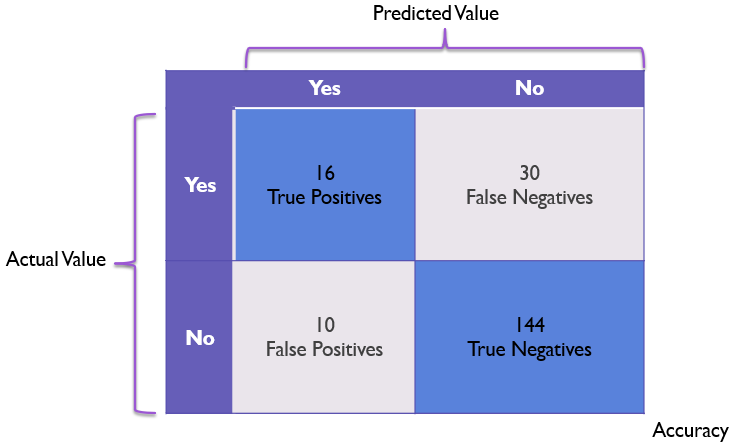



In [ ]:
# 7. Evaluate the Model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[2 0]
 [0 2]]
